# 이미지 전처리 - 색 공간 변형
CNN에 이미지를 학습시키기 이전에 이미지를 전처리 하는 과정이 필요합니다. 이번 실습에서는 이미지의 색 공간을 tensorflow로 변형해보겠습니다.

### RGB
RGB 영상은 빛의 삼원색을 이용하여 색을 표현하는 방식입니다. 일반적으로 디지털 컬러 이미지는 대부분 RGB의 가산혼합으로 이루어져 있습니다.

 * RGB Image = [Width, Height, Channel]
    * Width : 영상의 가로 길이
    * Height : 영상의 세로 길이
    * Channel : R, G, B 3개의 채널
    
### GRAY
Gray 영상은 색(color) 정보를 사용하지 않고 밝기 정보만으로 영상을 표현합니다. 검정색(0) 부터 흰색(255)까지 총 256단계의 밝기값(intensity)으로 이미지 픽셀 값을 표현합니다.

* Gray Image = [Width, Height, Channel]
    * Width : 영상의 가로 길이
    * Height : 영상의 세로 길이
    * Channel : 1개의 채널
    
* tf.image.rgb_to_grayscale(image)
    * image : 입력 RGB 영상
    
-----------------------------------------
#### Tip

* Gray 영상은 1개의 Channel만 갖고 있으므로 영상의 차원을 줄이기 위해 np.squeeze() 함수로 1개짜리 Channel 차원을 없애줍니다.

-------------------------------
### HSV
HSV 영상은 Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현합니다.

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d2d5dc8c48f829887415373/HSV%20color%20coordinate.jpg

사진 출처 : https://ko.wikipedia.org/wiki/HSV_색_공간

------------------------------
* Hue : 색조 표현 (붉은 계열 or 푸른 계열)
* Saturation : 색의 채도 표현 (색의 선명함)
* Value : 색의 밝기(intensity) 표현
---------------------
* tf.image.rgb_to_hsv(image)
    * image : 입력 RGB 영상
    
### YUV
YUV 영상은 빛의 밝기를 나타내는 휘도(Y)와 색상신호 2개(U, V)로 표현하는 방식입니다.

TV나 비디오 카메라에서 많이 사용되는 방식으로 RGB 영상보다 메모리 효율이 좋습니다.

* Y : 빛의 밝기 (Gray 영상)
* U : 청색 색차
* V : 적색 색차

* tf.image.rgb_to_yuv(image)
    * image : 입력 RGB 영상
    
------------------------------
   
#### Tip

Tensorflow에서 좀 더 정확하게 hsv, yuv 영상을 계산하기 위해 0 ~ 255 사이의 정수 픽셀 값을 0 ~ 1 사이의 float 값으로 바꿔주어야 합니다.

### 실습
원본 img를 Gray 영상으로 바꿔보세요.

원본 img를 HSV 영상으로 바꿔보세요.

원본 img를 YUV 영상으로 바꿔보세요.

각 영상이 의미하는 값을 이해해보세요.

TypeError: Image data of dtype object cannot be converted to float

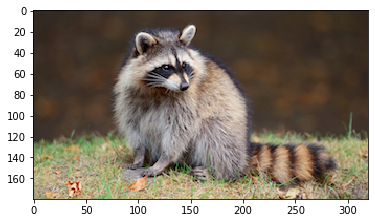

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image


# HSV, YUV 색 공간으로 변형하기 위한 Integer to Float 함수
# 0~255의 RGB 픽셀 값을 0~1의 Float 값으로 정규화한다. 
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# 이미지 출력을 위한 함수
def Visualize(images, color_map = None):
    plt.imshow(images, cmap = color_map)
#     plt.savefig('plot.png')
    
# 원본 이미지 불러오기
img = np.array(Image.open('./raccoon.jpg'))
# 원본 이미지 출력
Visualize(img)


## TODO : Gray 영상으로 변환해보세요.
gray = tf.image.rgb_to_grayscale(img)
# Gray 영상은 채널이 1개이기 때문에 1개의 채널을 지워준다.
gray = np.squeeze(gray)
# Gray 영상 출력
Visualize(gray, 'gray')


# 0~1사이의 Float값으로 Normalize하기 위한 전처리 과정 
hsv = np.float32(img)
hsv = MinMaxScaler(hsv)

## TODO : HSV 영상으로 변환해보세요
hsv = tf.image.rgb_to_hsv(hsv)

# HSV 영상 출력
Visualize(hsv , 'hsv')

# 0~1사이의 Float값으로 Normalize하기 위한 전처리 과정 
yuv = np.float32(img)
yuv = MinMaxScaler(yuv)
## TODO : YUV 영상으로 변환
yuv = tf.image.rgb_to_yuv(yuv)

# YUV 영상 출력
Visualize(yuv)


# 이미지 전처리 - Data augmentation
색 공간 변형 외에 영상 자체의 값이나 크기를 변경하는 전처리 진행해보겠습니다. CNN을 학습하기 이전에 본인이 원하는 목적에 따라 입력 영상을 조율한다면 더 좋은 성능을 끌어낼 수 있습니다.

### Resize
Resize를 통해 영상의 크기를 조절할 수 있습니다. 영상의 크기를 줄이면 메모리 효율이 올라가지만 학습의 성능은 떨어질 수 있습니다.

------------------------------
* tf.image.resize(Image, Size)
    * Image : 입력 영상
    * Size : [Width, Height]
    
-----------------------------
### Rotate
Rotate는 영상을 90도씩 회전시켜줍니다. 원본 영상과 회전된 영상을 같이 CNN에 학습시켜 모델을 일반화 할 수 있습니다.

* tf.image.rot90(Image, k)
    * Image : 입력 영상
    * k : scalar 정수, 1씩 증가할 때마다 90도씩 회전

-----------------------------------------
### Flip
Flip은 영상을 반전시켜줍니다. 마찬가지로 Flip을 통해 데이터를 증가시키고 CNN에 학습시켜 모델을 일반화 할 수 있습니다.

-----------------------------------
* tf.image.random_flip_left_right(Image,Seed)
    * Image : 입력 영상
    * Seed : 난수를 위한 시드 값
    
* tf.image.random_flip_up_down(Image, Seed)
    * Image : 입력 영상
    * Seed : 난수를 위한 시드 값

-------------------------------------------
### Color Augmentation
RGB 영상의 특정 색 공간에 값을 조정할 수 있습니다. 이를 통해 조명이나 채도, 명도 등에 강인한 모델을 만들 수 있습니다.

-----------------------------
* tf.image.random_hue(Image, max_delta)
    * Image : 입력 영상
    * max_delta : Hue를 적용할 비율 [0 ~ 0.5]
    
* tf.image.random_saturation(Image, lower, upper)
    * Image : 입력 영상
    * lower : Float 형태의 Lower bound
    * upper : Float 형태의 Upper bound
    
* tf.image.random_brightness(Image, max_delta)
    * Image : 입력 영상
    * max_delta : Float 형태의 양수
    
* tf.image.random_contrast(Image, lower, upper)
    * Image : 입력 영상
    * lower : Float 형태의 Lower bound
    * upper : Float 형태의 Upper bound

--------------------------------------
### Crop
Crop은 영상 내에서 랜덤하게 잘라내는 방법입니다. 영상을 Resize해 축소시키는 경우, 영상 내 데이터의 손실이 생깁니다. 이를 대신해 Crop으로 영상의 작은 부분을 학습 할 수 있습니다.

--------------------------------------
* tf.image.random_crop(Image, size)
    * Image : 입력 영상
    * size : Crop size [width, height, channel]
        
### 실습
원본 영상을 Resize 해보세요. 영상이 어떻게 변하는지 확인해보세요.

원본 영상을 Rotate, Flip 해보세요.

원본 영상에 color Augmentation을 진행해보세요.

원본 영상을 Random_crop 해보세요.

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

# 이미지 시각화를 위한 함수
def Visualize(images, name):
    plt.imshow(images)
    plt.title(name)
#     plt.savefig('plot.png')
    
# 원본 이미지 불러오기
img = np.array(Image.open('./raccoon.jpg'))

# TODO : 원본 이미지의 Size를 임의의 값으로 바꿔보세요. 입력 영상의 픽셀 값이 Float [0~1] 형태의 데이터여야 합니다.
resize = tf.image.resize(img, [16,20])

# TODO : 원본 이미지를 회전시켜보세요.
rotate = tf.image.rot90(img, 9)

# TODO : 원본 이미지를 좌우반전, 상하반전 시켜보세요.
flip_LR = tf.image.random_flip_left_right(img,1)
flip_UD = tf.image.random_flip_up_down(img, 1)

# TODO : 원본 이미지에 Color Augmentation을 진행해보세요.
hue = tf.image.random_hue(img, 0.5)
saturation = tf.image.random_saturation(img, 0.3, 0.5) 
brightness = tf.image.random_brightness(img, 0.6)
contrast = tf.image.random_contrast(img, 3, 9)

# TODO : 원본 이미지를 랜덤으로 Crop해보세요. 임의의 Crop size를 지정해보세요.
random_crop = tf.image.random_crop(img, [50,50,3])

Visualize(img, 'Origin')
Visualize(resize, 'Resize')
Visualize(rotate, 'Rotate')
Visualize(flip_LR, 'Flip Left & Right')
Visualize(flip_UD, 'Flip Up & Down')
Visualize(hue, 'HUE')
Visualize(saturation, 'SATURATION')
Visualize(brightness, 'BRIGHTNESS')
Visualize(contrast, 'CONTRAST')
Visualize(random_crop, 'Random Crop')


AttributeError: module 'tensorflow.python.ops.image_ops' has no attribute 'resize'

# Convolution Layer
Tensorflow에는 합성곱 신경망 (Convolution Neural Network)를 구성하기 위한 여러 함수들을 제공합니다.

실습을 통해 Convolution Layer를 구성하는 방법에 대해 알아보겠습니다.

### Convolution

---------------------------------
#### Tensorflow 합성곱 함수

* keras.layers.Conv2D(filters, kernal_size, strides, padding, activation)(image)
    * filgers : output filter의 개수
    * kernel : Convolution을 위한 kernel
    * stride : 정수 및 튜플, 리스트 형태의 값 ex) [2,2]
    * padding : SAME / VALID
    * activation : 활성화 함수
    * image : 입력 영상

--------------------------
### Stride
Stride를 통해 이미지 픽셀을 건너뛰며 합성곱 연산을 진행합니다. 이를 통해 이미지의 차원을 줄일 수 있습니다.

    Output size= {(Image−Kernel)/stride} +1

### Padding
Kernel이 이미지 경계를 벗어나지 않도록 하거나 경우에 따라 경계를 벗어나는 경우 모자라는 부분을 채워줍니다.

    * SAME : 합성곱 입력과 출력을 같게 합니다.
    * VALID	: Kernel이 이미지 경계를 벗어나지 않도록 합니다.

-------------------------------------
관련 링크

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D $$$$
https://github.com/deeplearningzerotoall/TensorFlow/blob/master/lab-11-0-cnn-basics-keras-eager.ipynb

---------------------------------------
### 실습
작성된 코드를 보고 이해해보세요.

keras.layers.Conv2D()를 선언해보세요.

conv2d를 수행해보세요.

keras.layers.Conv2D()의 내부 파라미터를 바꿔가며 결과를 확인해보세요.

결과 영상을 보고 합성곱 연산이 어떻게 수행됐는지 확인해보세요.

Image shape :  (1, 3, 3, 1)
Kernel shape :  (2, 2, 1, 1)


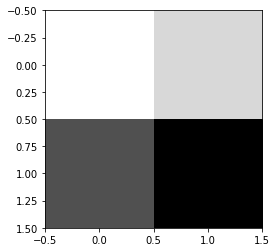

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras


def Visualize(image, x, y):
    plt.imshow(image.reshape(x,y), cmap ='Greys')
#     plt.savefig('plot.png')    

# 임의의 3 x 3 x 1 영상을 하나 만들어줍니다.
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype = np.float32)

# 합성곱 연산을 위해 임의의 2 x 2 x 1 커널을 하나 만들어줍니다.
kernel = np.array([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])


# 이미지 Shape 출력 : (num of image, width, height, channel)
print('Image shape : ', image.shape)
# 커널 Shape 출력 : (width, height, channel, num of kernel)
print('Kernel shape : ', kernel.shape)
# tf.nn.conv2d에 넣기 위해 이미지와 커널의 Shape을 위와 같이 만들었습니다.


# Gray 이미지 출력
Visualize(image, 3 ,3)

kernel_init = tf.constant_initializer(kernel)
# Convolution Layer 선언
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID',kernel_initializer=kernel_init)(image)
Visualize(conv2d.numpy(), 2,2)


# Max Pooling Layer
앞의 실습에서 합성곱 연산이 어떻게 이루어지는지 확인했습니다.

전체적인 CNN (Convolution Neural Network)를 만들기 위해서는 몇가지 추가 기능이 더 필요합니다.

이번 실습에서는 Max Pooling Layer를 통해 영상이 어떻게 축소되는지 확인해보겠습니다.

#### Max Pooling layer
Max Pooling Layer는 일반적으로 Convolution Layer 뒤에 붙여 Conv layer의 결과(Feature Map)를 축소시키는데 사용합니다.

M x N 크기의 Pooling Filter를 적용하고, 그 안에서 가장 큰 값을 추출합니다.

Pooling 작업을 통해

* Feature map의 사이즈를 줄여 연산량을 줄임.
* Feature의 개수가 줄어들기 때문에 Overfitting 방지의 효과를 얻을 수 있습니다.

-----------------------------------
 keras.layers.MaxPool2D(pool_size, strides, padding)
    * pool_size : Pooling filter의 크기
    * strides : Filter를 적용할 간격
    * padding : SAME or VALID
    
### 실습
pool에 Maxpooling layer를 선언해보세요.

pool_size, strides, padding 등 파라미터를 바꿔가며 결과 영상을 확인해보세요.

(1, 2, 2, 1)
[[[[ 5.]
   [ 7.]]

  [[ 8.]
   [10.]]]]


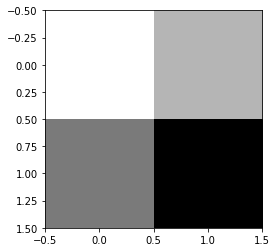

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

def Visualize(image, x, y):
    plt.imshow(image.reshape(x,y), cmap ='Greys')
#     plt.savefig('plot.png')


    
# 임의의 4 x 4 x 1 영상을 하나 만들어줍니다.
image = np.array([[[[1],[2],[3],[4]],
                   [[4],[5],[6],[7]],
                   [[7],[8],[9],[10]],
                   [[3],[5],[7],[9]]]], dtype = np.float32)

# Max Pooling Layer를 선언해보세요.
pool = keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'SAME')(image)

print(pool.shape)
print(pool.numpy())

# 원본 영상과 Max Pooling 후 영상을 출력해보세요.
# Image
Visualize(image,4,4)
# Pool
Visualize(pool.numpy(),2,2)


# Keras로 CNN 구현하기
### MNIST Dataset
MNIST 데이터는 0 ~ 9까지의 손글씨 이미지로 구성되어 있으며 데이터의 Label은 0 ~ 9의 정수로 이루어져 있습니다.

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d2ea42dd05893dd120270b4/MNIST.png

MNIST 데이터를 이용해 CNN을 학습시키고 분류하는 관찰 실습을 진행해보겠습니다.

### Keras CNN
Keras에서는 CNN을 구성하기 위한 Layer 메소드를 지원합니다.

앞서 실습을 기반으로 Conv - MaxPool -Dense 순서로 CNN 모델을 작성합니다.

----------------------------
### keras CNN

* keras.layers.Conv2D(filters, kernel_size, activation, padding)
    * filters : Output filter 개수
    * kernel_size : Weight Kernel 크기
    * activation : 활성화 함수
    * padding : ‘SAME’ or ‘VALID’
$$$$
* keras.layers.MaxPool2D(padding='SAME') $$$$
* padding : ‘SAME’ or ‘VALID’$$$$
* keras.layers.Flatten() : Conv Layer의 결과는 N-dim의 텐서형태입니다. 이를 1차원으로 평평하게 만들어줍니다.$$$$
* keras.layers.Dense(node, activation)
    * node : 뉴런 개수
    * activation : 활성화 함수

관련 링크 :
https://keras.io/models/sequential/

### 실습
작성된 코드를 보고 이해해보세요.

CNN()의 구조를 바꿔가며 결과가 어떻게 바뀌는지 학습에 필요한 파라미터의 개수는 어떻게 변하는지 확인해보세요.

model.fit()의 인자를 바꿔가며 성능을 확인해보세요.

model.evaluate(), model.predict_classes()로 예측한 결과를 확인해보세요.

Visulaize()함수로 loss,와 accuracy를 시각화해보세요.

-------------------------------
#### TIP!

이미지를 학습시킬때 0 ~ 255 사이의 값을 0 ~ 1사이의 float값으로 정규화를 해준 후 진행해야합니다.

Label을 클래스화 하기 위해 0 ~ 9 사이의 Label값을 One-Hot Encoding 해줘야합니다.



11493376/11490434 [==============================] - 7s 1us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_______________________________________________________

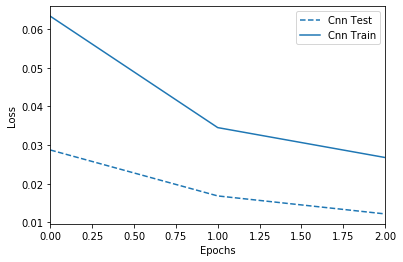

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

def Visulaize(histories, key='loss'):
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Test')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])    
#     plt.savefig("plot.png")

# MNIST 데이터 세트를 불러옵니다.
mnist = keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

# MNIST 데이터 이미지를 0~1사이 값으로 정규화해줍니다.
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# 입력 Shape을 맞춰주기 위해 맨 끝에 1차원 Dimension을 하나 추가해줍니다.
# [Num of data, Width, Height] ---->> [Num of data, Width, Height, Channel]
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# 0 ~ 9 사이 값인 Label을 클래스화 하기 위해 One-Hot Encoding을 진행합니다.
# ex 1 ---> [0,0,0,0,0,0,0,0,0,1], 2 ----> [0,0,0,0,0,0,0,0,1,0] ...
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

# CNN 모델을 만들어줍니다.
def CNN():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10))
    return model

# model에 CNN 모델을 넣고 모델이 어떻게 생겼는지 확인해보세요..
model = CNN()
model.summary()

# 모델을 학습할 방법과 Error 계산 방법, 평가 방법을 설정합니다.
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

# 모델을 학습시켜줍니다.
# verbose의 값에 따라 출력 형태를 바꿀 수 있습니다.
# 0 : silent, 1 : progress bar, 2 : one line per epoch
history = model.fit(train_images, train_labels, epochs = 3, batch_size = 500, validation_data = (test_images, test_labels), verbose = 2)

# 테스트 데이터로 모델을 검증합니다.
loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
print('Test Data로 예측한 클래스 : ',model.predict_classes(test_images))

# loss와 accuracy를 시각화할 수 있습니다.
Visulaize([('CNN', history)], 'loss')



# Data Augmentation + CNN
이번 미션에서는 MNIST 데이터에 Data Augmentation을 진행한 후 CNN을 학습시켜보겠습니다.

Data Augmentation으로 데이터의 개수를 늘리는 대신 아주 적은 데이터로만 CNN을 학습시키고 결과를 도출해보겠습니다.

### 미션
X_train, X_test, y_train, y_test에 MNIST 데이터를 Train 100개, Test 20개씩 나눠서 넣어주세요.

이미지 데이터(X_train, X_test)의 픽셀 값을 0 ~ 1의 Float값으로 바꾸고 Shape도 바꿔주세요.

data_augmentation() 메서드를 완성시켜보세요.

Label (y_train, y_test)를 One Hot Encoding 해주세요.

CNN()모델을 만들고 모델을 학습시켜보세요.

Test Accuracy가 80% 이상이 되도록 CNN 모델을 학습시켜보세요.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from random import randrange

# MNIST 데이터를 불러옵니다.
mnist = np.load('./data/mnist.npz')
# TODO : Train Data와 Test Data로 분리해보세요.
# 데이터의 개수는 Train 100개, Test 20개로 분리합니다.
X_train, X_test, y_train, y_test = mnist['x_train'][:100], mnist['x_test'][:20], mnist['y_train'][:100], mnist['y_test'][:20]

# TODO : Train Data의 Pixel 값을 0 ~ 255에서 0 ~ 1 사이의 Float 데이터로 바꿔보세요.
X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

# TODO : (num of data, 28, 28) 형태의 데이터를 (num of data, 28, 28, 1)로 만들어보세요. 
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Data Augmenation을 위한 메서드입니다.
def data_augmentation(image, label):
    rotate_img = []
    rotate_label = []
    flip_img = []
    flip_label = []
    
    print('Doing image argumentation...\n')
    for x, y in zip(image, label):
        # TODO : 입력 영상을 Rotate 해보세요. 단 Rotate 각도는 Random으로 설정해주세요.
        rotate_img.append(tf.image.rot90(x,randrange(4)))
        rotate_label.append(y)
        
        # TODO : 입력 영상을 좌우반전해보세요.
        flip_img.append(tf.image.random_flip_left_right(x,randrange(4)))
        flip_label.append(y)
        
    aug_img = np.array(rotate_img + flip_img)
    aug_label = np.array(rotate_label + flip_label)
    print('Image argumentation DONE...\n')
    return aug_img, aug_label
    
# TODO : Augmenation을 거친 데이터를 저장해주세요.
aug_X_train, aug_y_train = data_augmentation(X_train, y_train)

print('Doing Concatenate...\n')
X_train = np.concatenate((X_train,aug_X_train))
y_train = np.concatenate((y_train,aug_y_train))

# TODO : 0 ~ 9값을 가진 Data Label을 One Hot encoding 해주세요
y_train =  to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)  

# TODO : CNN 모델을 만들어보세요.
def CNN():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding='VALID', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='VALID'))
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='VALID'))
    model.add(keras.layers.MaxPool2D(padding='VALID'))
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='VALID'))
    # model.add(keras.layers.MaxPool2D(padding='VALID'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation=tf.nn.relu))
    # model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10))
    return model


# 모델이 어떻게 생겼는지 확인해보세요..
model = CNN()
model.summary()

# TODO : 모델을 학습할 방법과 Error 계산 방법, 평가 방법을 설정해보세요.
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

# TODO : 모델을 학습시켜보세요..
# verbose의 값에 따라 출력 형태를 바꿀 수 있습니다.
# 0 : silent, 1 : progress bar, 2 : one line per epoch
history = model.fit(X_train,y_train , epochs = 90, batch_size = 90, validation_data = (X_test, y_test), verbose = 2)

# TODO : Test Data로 모델을 검증해보세요.
loss, test_acc = model.evaluate(X_test, y_test)

# 결과를 보고 분석해보세요.
print('Test Loss : {:.4f} | Test Accuracy : {}'.format(loss, np.round(test_acc,3)))
print('Test Data로 예측한 클래스 : ',model.predict_classes(X_test))
print('Test Data의 실제 클래스   : ',[np.argmax(i) for i in y_test])


Doing image argumentation...

Image argumentation DONE...

Doing Concatenate...

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          2320      
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________

Epoch 67/90
300/300 - 0s - loss: 0.0135 - accuracy: 0.9867 - val_loss: 0.0451 - val_accuracy: 0.7500
Epoch 68/90
300/300 - 0s - loss: 0.0132 - accuracy: 0.9833 - val_loss: 0.0436 - val_accuracy: 0.8000
Epoch 69/90
300/300 - 0s - loss: 0.0129 - accuracy: 0.9867 - val_loss: 0.0434 - val_accuracy: 0.7500
Epoch 70/90
300/300 - 1s - loss: 0.0127 - accuracy: 0.9867 - val_loss: 0.0452 - val_accuracy: 0.7500
Epoch 71/90
300/300 - 1s - loss: 0.0126 - accuracy: 0.9900 - val_loss: 0.0449 - val_accuracy: 0.7500
Epoch 72/90
300/300 - 0s - loss: 0.0125 - accuracy: 0.9867 - val_loss: 0.0439 - val_accuracy: 0.7500
Epoch 73/90
300/300 - 1s - loss: 0.0121 - accuracy: 0.9900 - val_loss: 0.0426 - val_accuracy: 0.7500
Epoch 74/90
300/300 - 0s - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0444 - val_accuracy: 0.7500
Epoch 75/90
300/300 - 0s - loss: 0.0115 - accuracy: 0.9933 - val_loss: 0.0451 - val_accuracy: 0.7500
Epoch 76/90
300/300 - 0s - loss: 0.0114 - accuracy: 0.9933 - val_loss: 0.0443 - val_accurac